## Tweet Emotion Recognition: Natural Language Processing with TensorFlow



## Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
dataset = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]

  return tweets, labels

In [ ]:
tweets, labels = get_tweet(train)
print(type(labels[0]))
print(labels)
print(len(labels))

<class 'int'>
[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3

In [ ]:
def change_labels(labels):
  for i in range(len(labels)):
    if labels[i] == 0:
      labels[i] = 'sadness'

    elif labels[i] == 1:
      labels[i] = 'joy'

    elif labels[i] == 2:
      labels[i] = 'love'

    elif labels[i] == 3:
      labels[i] = 'anger'

    elif labels[i] == 4:
      labels[i] = 'fear'

    elif labels[i] == 5:
      labels[i] = 'surprise'

  return labels

In [ ]:
#labels = change_labels(labels)
print(labels)

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3, 1, 2, 1, 1, 

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

In [ ]:
from collections import Counter

In [ ]:
dic = Counter(labels)
print(dic)

Counter({1: 5362, 0: 4666, 3: 2159, 4: 1937, 2: 1304, 5: 572})


## Tokenizer

Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 10000, oov_token= '<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

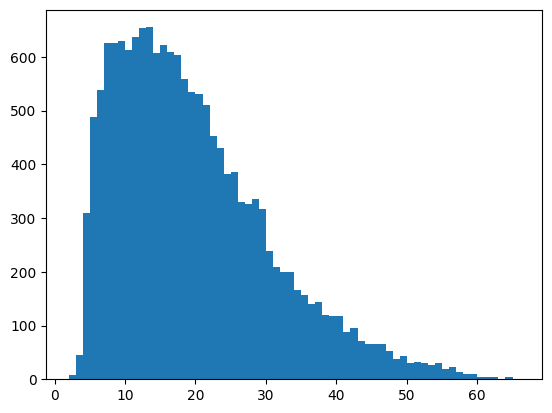

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()


In [ ]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)
print(padded_train_seq[1])
print(len(padded_train_seq[1]))

[   2   40  101   60    8   15  494    5   15 3496  553   32   60   61
  128  148   76 1480    4   22 1255    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
50


## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
classes

{0, 1, 2, 3, 4, 5}

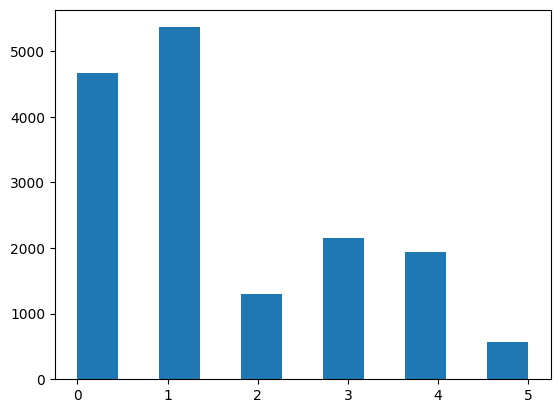

In [ ]:
plt.hist(labels, bins= 11)
plt.show()

In [ ]:
train_labels = np.array(labels)

In [ ]:
train_labels[0]

0

In [ ]:
len(train_labels)

16000

## Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
# model = tf.keras.models.Sequential([
#         tf.keras.layers.Embedding(10000, 16, input_length = maxlen),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
#         tf.keras.layers.Dense(6, activation = 'softmax')

# ])

# model.compile(

#     loss = 'sparse_categorical_crossentropy',
#     optimizer = 'adam',
#     metrics = ['accuracy']
# )

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = tf.keras.models.Sequential([
    Embedding(10000, 32, input_length=maxlen),  # Experiment with embedding dimension
    Bidirectional(LSTM(64, return_sequences=True)),  # Experiment with units and architecture
    Bidirectional(LSTM(32)),
    Dropout(0.3),  # Add dropout for regularization
    Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Experiment with optimizer
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            320000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 50, 128)           49664     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 411270 (1.57 MB)
Trainable params: 41127

## Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
#val_labels = change_labels(val_labels)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = np.array(val_labels)
len(val_labels)

2000

In [ ]:
val_tweets[5], val_labels[5]

('i start to feel more appreciative of what god has done for me', 1)

In [ ]:
print(type(padded_train_seq))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq, val_labels),
    epochs = 20,
    callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 26s 39ms/step - loss: 1.4829 - accuracy: 0.4173 - val_loss: 1.1967 - val_accuracy: 0.5595
Epoch 2/20
500/500 [==============================] - 7s 15ms/step - loss: 0.9203 - accuracy: 0.6638 - val_loss: 0.7426 - val_accuracy: 0.7485
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 0.5676 - accuracy: 0.8055 - val_loss: 0.4779 - val_accuracy: 0.8455
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.4020 - accuracy: 0.8696 - val_loss: 0.3873 - val_accuracy: 0.8735
Epoch 5/20
500/500 [==============================] - 6s 13ms/step - loss: 0.2969 - accuracy: 0.9051 - val_loss: 0.3381 - val_accuracy: 0.8855
Epoch 6/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2312 - accuracy: 0.9231 - val_loss: 0.2915 - val_accuracy: 0.8985
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.1924 - accuracy: 0.9381 - val_loss: 0.2870 - val_accuracy: 0.900

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

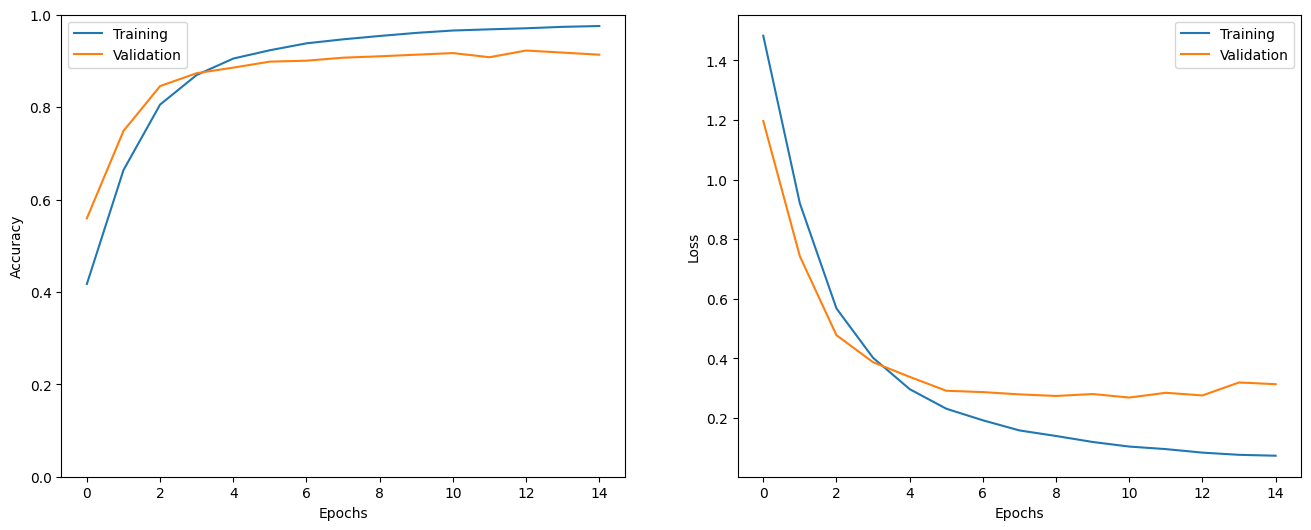

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = np.array(test_labels)

In [ ]:
i = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.9075


In [ ]:
j = random.randint(0, len(test_labels)-1)

print('sentence:', test_tweets[j])
print('emotion:', test_labels[j])

p = model.predict(np.expand_dims(test_seq[j], axis = 0))[0]
pred_class = np.argmax(p).astype('uint8')

print('pred emotion:', pred_class)

sentence: i was so impressed with the show especially for hs and i was moved by these talented kids but then again i feel very passionate about productions and music and theatre in schools so i am always happy to endorse many hs productions throughout their seasons during this time
emotion: 2
1/1 [==============================] - 2s 2s/step
pred emotion: 2


In [ ]:
preds = model.predict(test_seq)
preds_ = np.argmax(preds, axis = 1)

63/63 [==============================] - 0s 6ms/step


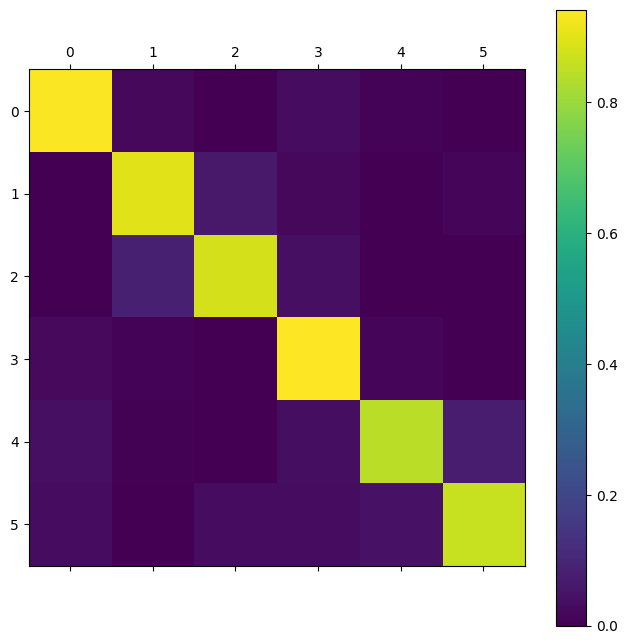

In [ ]:
show_confusion_matrix(test_labels, preds_, list(classes))